In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import t, norm, skewnorm, cauchy, chi2

import os
os.chdir("../")
os.getcwd()

'/home/mario/PhD/spatial_lda'

In [2]:
import spatial_mix.utils as spmix_utils
import spatial_mix.hdp_utils as hdp_utils

In [3]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
TITLE_FONT_SIZE = 14
AXIS_FONT_SIZE = 12

In [4]:
xgrid = np.linspace(-10, 10, 1000)

true_dens_scenario12 = [
    t.pdf(xgrid, 6, -4, 1), t.pdf(xgrid, 6, -4, 1),
    skewnorm.pdf(xgrid, 4, 4, 1), skewnorm.pdf(xgrid, 4, 4, 1),
    chi2.pdf(xgrid, 3, 0, 1), chi2.pdf(xgrid, 3, 0, 1)
]

true_dens_scenario3 = [
    t.pdf(xgrid, 6, -4, 1), t.pdf(xgrid, 6, -4, 1),
    skewnorm.pdf(xgrid, 4, 4, 1), skewnorm.pdf(xgrid, 4, 4, 1),
    cauchy.pdf(xgrid, 0, 1), cauchy.pdf(xgrid, 0, 1)
]

In [6]:
spmix_folder = "data/simulation1/spmix/dens"
hdp_folder = "data/simulation1/hdp/dens"
jo_folder = "data/simulation1/jo/dens"

### SPMIX

In [ ]:
hell_dists_spmix = []
kl_divs_spmix = []

for scen in range(3):
    print("Scen: {0}".format(scen))
    curr_hell = []
    curr_kl = []
    for rep in range(100):
        print("\rRep: {0}".format(rep), end=" ", flush=True)
        
        densfile = os.path.join(spmix_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
        with open(densfile, 'rb') as fp:
            dens = pickle.load(fp)
        
        if scen < 2:
            for loc in range(6):
                curr_hell.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_hellinger_dist(
                        dens["dens"][loc], true_dens_scenario12[loc], xgrid))))
                
                curr_kl.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_kl_div(
                        dens["dens"][loc], true_dens_scenario12[loc], xgrid))))
        else:
            for loc in range(6):
                curr_hell.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_hellinger_dist(
                        dens["dens"][loc], true_dens_scenario3[loc], xgrid))))
                
                curr_kl.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_kl_div(
                        dens["dens"][loc], true_dens_scenario3[loc], xgrid))))
                
    hell_dists_spmix += curr_hell
    kl_divs_spmix += curr_kl

In [ ]:
hell_spmix_df = pd.DataFrame(hell_dists_spmix, columns=["Scenario", "Rep", "Location", "Dist"])
kl_spmix_df = pd.DataFrame(kl_divs_spmix, columns=["Scenario", "Rep", "Location", "Dist"])

hell_spmix_df.to_csv("data/simulation1/spmix/dens/hell_results.csv")
kl_spmix_df.to_csv("data/simulation1/spmix/dens/kl_results.csv")

### HDP

In [ ]:
hell_dists_hdp = []
kl_divs_hdp = []

for scen in range(3):
    print("Scen: {0}".format(scen))
    curr_hell = []
    curr_kl = []
    for rep in range(100):
        print("\rRep: {0}".format(rep), end=" ", flush=True)
        
        densfile = os.path.join(hdp_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
        with open(densfile, 'rb') as fp:
            dens = pickle.load(fp)
        
        if scen < 2:
            for loc in range(6):
                curr_hell.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_hellinger_dist(
                        dens["dens"][loc], true_dens_scenario12[loc], xgrid))))
                
                curr_kl.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_kl_div(
                        dens["dens"][loc], true_dens_scenario12[loc], xgrid))))
        else:
            for loc in range(6):
                curr_hell.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_hellinger_dist(
                        dens["dens"][loc], true_dens_scenario3[loc], xgrid))))
                
                curr_kl.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_kl_div(
                        dens["dens"][loc], true_dens_scenario3[loc], xgrid))))
                
    hell_dists_hdp += curr_hell
    kl_divs_hdp += curr_kl

In [ ]:
hell_hdp_dp = pd.DataFrame(hell_dists_hdp, columns=["Scenario", "Rep", "Location", "Dist"])
kl_hdp_df = pd.DataFrame(kl_divs_hdp, columns=["Scenario", "Rep", "Location", "Dist"])

hell_hdp_dp.to_csv("data/simulation1/hdp/dens/hell_results.csv")
kl_hdp_df.to_csv("data/simulation1/hdp/dens/kl_results.csv")

### JO

In [14]:
hell_dists_jo = []
kl_divs_jo = []
for scen in range(3):
    print("Scen: {0}".format(scen))
    curr_hell = []
    curr_kl = []
    for rep in range(100):
        print("\rRep: {0}".format(rep), end=" ", flush=True)
        
        densfile = os.path.join(jo_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
        with open(densfile, 'rb') as fp:
            dens = pickle.load(fp)

        hell_dists_jo += dens['hell_dits']
        kl_divs_jo += dens["kl_divs"]

Scen: 0
Rep: 99 Scen: 1
Rep: 99 Scen: 2
Rep: 99    

In [17]:
hell_jo_df = pd.DataFrame(hell_dists_jo, columns=["Scenario", "Rep", "Location", "Dist"])
kl_jo_df = pd.DataFrame(kl_divs_jo, columns=["Scenario", "Rep", "Location", "Dist"])

hell_jo_df.to_csv("data/simulation1/jo/dens/hell_results.csv")
kl_jo_df.to_csv("data/simulation1/jo/dens/kl_results.csv")

## TABLES - HELLINGER

In [20]:
spmix_df = pd.read_csv("data/simulation1/spmix/dens/hell_results.csv")
hdp_df = pd.read_csv("data/simulation1/hdp/dens/hell_results.csv")
jo_df = pd.read_csv("data/simulation1/jo/dens/hell_results.csv")

table = []
for scen in range(3):
    curr_spmix = spmix_df[spmix_df["Scenario"] == scen]
    curr_hdp = hdp_df[hdp_df["Scenario"] == scen]
    curr_jo = jo_df[jo_df["Scenario"] == scen]
    
    means_spmix = []
    means_hdp = []
    means_jo = []
    stddevs_spmix = []
    stddevs_hdp = []
    stddevs_jo = []
    for loc in range(6):
        means_spmix.append(
            np.mean(curr_spmix[curr_spmix["Location"] == loc]["Dist"]))
        stddevs_spmix.append(
            np.std(curr_spmix[curr_spmix["Location"] == loc]["Dist"]))
        
        means_hdp.append(
            np.mean(curr_hdp[curr_hdp["Location"] == loc]["Dist"]))
        stddevs_hdp.append(
            np.std(curr_hdp[curr_hdp["Location"]== loc]["Dist"]))
        
        means_jo.append(
            np.mean(curr_jo[curr_jo["Location"] == loc]["Dist"]))
        stddevs_jo.append(
            np.std(curr_jo[curr_jo["Location"]== loc]["Dist"]))
    
    row1 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_spmix, stddevs_hdp)]
    row1 = "Scenario {0} & spmix & ".format(scen + 1) + " & ".join(row1) + r"\\"
    
    row2 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_hdp, stddevs_hdp)]
    row2 = "& HDP & ".format(scen + 1) + " & ".join(row2) + r"\\"
    
    row3 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_jo, stddevs_jo)]
    row3 = "& CK-SSM & ".format(scen + 1) + " & ".join(row3) + r"\\"
    
    table.append(row1)
    table.append(row2)
    table.append(row3)
    
    table.append(r"\hline")
    
for row in table:
    print(row)

Scenario 1 & spmix & $0.06 \pm 0.01$ & $0.06 \pm 0.01$ & $0.06 \pm 0.01$ & $0.06 \pm 0.01$ & $0.09 \pm 0.01$ & $0.09 \pm 0.01$\\
& HDP & $0.03 \pm 0.01$ & $0.03 \pm 0.01$ & $0.06 \pm 0.01$ & $0.06 \pm 0.01$ & $0.09 \pm 0.01$ & $0.09 \pm 0.01$\\
& CK-SSM & $0.44 \pm 0.06$ & $0.44 \pm 0.06$ & $0.53 \pm 0.03$ & $0.53 \pm 0.03$ & $0.44 \pm 0.03$ & $0.44 \pm 0.03$\\
\hline
Scenario 2 & spmix & $0.08 \pm 0.01$ & $0.11 \pm 0.02$ & $0.07 \pm 0.01$ & $0.08 \pm 0.03$ & $0.11 \pm 0.00$ & $0.11 \pm 0.03$\\
& HDP & $0.04 \pm 0.01$ & $0.19 \pm 0.02$ & $0.09 \pm 0.01$ & $0.24 \pm 0.03$ & $0.10 \pm 0.00$ & $0.27 \pm 0.03$\\
& CK-SSM & $0.44 \pm 0.06$ & $0.43 \pm 0.06$ & $0.53 \pm 0.03$ & $0.53 \pm 0.03$ & $0.45 \pm 0.05$ & $0.45 \pm 0.05$\\
\hline
Scenario 3 & spmix & $0.20 \pm 0.07$ & $0.20 \pm 0.07$ & $0.16 \pm 0.06$ & $0.16 \pm 0.06$ & $0.11 \pm 0.05$ & $0.11 \pm 0.05$\\
& HDP & $0.12 \pm 0.07$ & $0.12 \pm 0.07$ & $0.21 \pm 0.06$ & $0.21 \pm 0.06$ & $0.13 \pm 0.05$ & $0.13 \pm 0.05$\\
& CK-SSM & $0

## TABLES -KL

In [22]:
spmix_df = pd.read_csv("data/simulation1/spmix/dens/kl_results.csv")
hdp_df = pd.read_csv("data/simulation1/hdp/dens/kl_results.csv")
jo_df = pd.read_csv("data/simulation1/jo/dens/kl_results.csv")

table = []
for scen in range(3):
    curr_spmix = spmix_df[spmix_df["Scenario"] == scen]
    curr_hdp = hdp_df[hdp_df["Scenario"] == scen]
    curr_jo = jo_df[jo_df["Scenario"] == scen]
    
    means_spmix = []
    means_hdp = []
    means_jo = []
    stddevs_spmix = []
    stddevs_hdp = []
    stddevs_jo = []
    for loc in range(6):
        means_spmix.append(
            np.mean(curr_spmix[curr_spmix["Location"] == loc]["Dist"]))
        stddevs_spmix.append(
            np.std(curr_spmix[curr_spmix["Location"] == loc]["Dist"]))
        
        means_hdp.append(
            np.mean(curr_hdp[curr_hdp["Location"] == loc]["Dist"]))
        stddevs_hdp.append(
            np.std(curr_hdp[curr_hdp["Location"]== loc]["Dist"]))
        
        means_jo.append(
            np.mean(curr_jo[curr_jo["Location"] == loc]["Dist"]))
        stddevs_jo.append(
            np.std(curr_jo[curr_jo["Location"]== loc]["Dist"]))
    
    row1 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_spmix, stddevs_hdp)]
    row1 = "Scenario {0} & spmix & ".format(scen + 1) + " & ".join(row1) + r"\\"
    
    row2 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_hdp, stddevs_hdp)]
    row2 = "& HDP & ".format(scen + 1) + " & ".join(row2) + r"\\"
    
    row3 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_jo, stddevs_jo)]
    row3 = "& CK-SSM & ".format(scen + 1) + " & ".join(row3) + r"\\"
    
    table.append(row1)
    table.append(row2)
    table.append(row3)
    
    table.append(r"\hline")
    
for row in table:
    print(row)

Scenario 1 & spmix & $0.01 \pm 0.00$ & $0.01 \pm 0.00$ & $0.01 \pm 0.00$ & $0.01 \pm 0.00$ & $0.02 \pm 0.01$ & $0.02 \pm 0.01$\\
& HDP & $0.00 \pm 0.00$ & $0.00 \pm 0.00$ & $0.01 \pm 0.00$ & $0.01 \pm 0.00$ & $0.02 \pm 0.01$ & $0.02 \pm 0.01$\\
& CK-SSM & $0.92 \pm 0.46$ & $0.92 \pm 0.46$ & $0.97 \pm 0.16$ & $0.98 \pm 0.16$ & $1.10 \pm 0.31$ & $1.10 \pm 0.31$\\
\hline
Scenario 2 & spmix & $0.02 \pm 0.00$ & $0.04 \pm 0.04$ & $0.02 \pm 0.01$ & $0.02 \pm 0.07$ & $0.03 \pm 0.01$ & $0.03 \pm 0.10$\\
& HDP & $0.01 \pm 0.00$ & $0.13 \pm 0.04$ & $0.03 \pm 0.01$ & $0.21 \pm 0.07$ & $0.03 \pm 0.01$ & $0.32 \pm 0.10$\\
& CK-SSM & $0.91 \pm 0.40$ & $0.90 \pm 0.40$ & $0.97 \pm 0.17$ & $0.97 \pm 0.17$ & $1.22 \pm 0.45$ & $1.23 \pm 0.44$\\
\hline
Scenario 3 & spmix & $0.15 \pm 0.19$ & $0.15 \pm 0.18$ & $0.09 \pm 0.25$ & $0.09 \pm 0.25$ & $0.06 \pm 0.12$ & $0.06 \pm 0.12$\\
& HDP & $0.16 \pm 0.19$ & $0.16 \pm 0.18$ & $0.26 \pm 0.25$ & $0.26 \pm 0.25$ & $0.13 \pm 0.12$ & $0.13 \pm 0.12$\\
& CK-SSM & $0

## PLOTS

In [29]:
import pystan

ngroups = 6
W = np.zeros((ngroups, ngroups))
W[0, 1] = W[1, 0] = 1
W[2, 3] = W[3, 2] = 1
W[4, 5] = W[5, 4] = 1

def eval_stan_density(stanfit, xgrid):
    means = stanfit.extract("means")["means"]
    variances = stanfit.extract("vars")["vars"]
    weights = stanfit.extract("weights")["weights"]
    out = []
    num_iters = means.shape[0]
    num_components = means.shape[1]

    means = means.reshape(-1)
    stddevs = np.sqrt(variances.reshape(-1))
    allgrid = np.hstack([xgrid.reshape(-1, 1)] * means.shape[0])

    eval_normals = norm.pdf(
        allgrid, means, stddevs
    ).reshape(len(xgrid), num_iters, num_components)

    numGroups = weights.shape[1]
    for g in range(numGroups):
        weights_chain = weights[:, g, :]
        out.append(np.sum(eval_normals*weights_chain, axis=-1).T)

    return out



def run_jo(model, datas):

    data_by_group_stan = []
    max_num_data = np.max([len(x) for x in datas])
    for i in range(6):
        data_by_group_stan.append(
            np.concatenate([datas[i], np.zeros(max_num_data - len(datas[i]))]))

    stan_data = {
        "num_groups": 6,
        "num_data_per_group": [len(x) for x in datas],
        "max_data_per_group": np.max([len(x) for x in datas]),
        "num_components": 10,
        "data_by_group": data_by_group_stan,
        "G": W,
        "rho": 0.95,
        "a": 0.1,
        "b": 0.5,
        "points_in_grid": len(xgrid),
        "xgrid": xgrid}

    fit = model.sampling(data=stan_data, iter=8000, n_jobs=1, chains=1)
    stan_dens = eval_stan_density(fit, xgrid)
    return stan_dens

In [25]:
scen = 0
rep = 1
filename = "data/simulation1/datasets/scenario{0}/rep{1}.csv".format(scen, rep)

df = pd.read_csv(filename)
currdata = []
for g in range(6):
    currdata.append(df[df['group'] == g]['datum'].values)

In [27]:
stan_model = pystan.StanModel(
        file="spatial_mix/resources/mc_car_ssm.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_da5571de5f682bb6a824e8154e5187a4 NOW.


NameError: name 'W' is not defined

In [30]:
jo_dens = run_jo(stan_model, currdata)
outfile = os.path.join(jo_folder, "scenario{0}/rep{1}_full.pickle".format(scen, rep))

TypeError: dump() missing required argument 'file' (pos 2)

In [42]:
with open(outfile, 'wb') as fp:
    pickle.dump({'xgrid': xgrid, 'dens': jo_dens}, fp)

## Scenario 1, random simulation

In [33]:
from spatial_mix.plots import density_plot

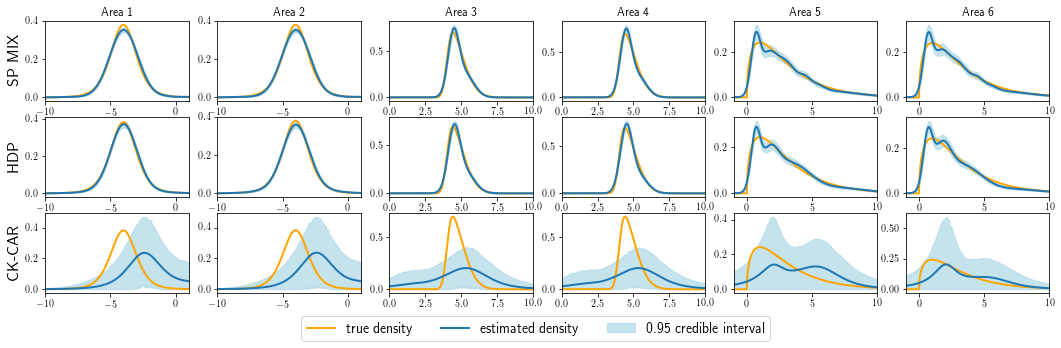

In [47]:
scen = 0
rep = 1

densfile = os.path.join(spmix_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
    
with open(densfile, 'rb') as fp:
    dens_spmix = pickle.load(fp)["dens"]
    
densfile = os.path.join(hdp_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
    
with open(densfile, 'rb') as fp:
    dens_hdp = pickle.load(fp)["dens"]
    
    
densfile = os.path.join(jo_folder, "scenario{0}/rep{1}_full.pickle".format(scen, rep))
with open(densfile, 'rb') as fp:
    dens_jo = pickle.load(fp)["dens"]

    
fig, axes = plt.subplots(3, 6, figsize=(18, 5))
for i in range(6):
    density_plot(dens_spmix[i], true_dens_scenario12[i], xgrid, axes[0][i], "Area {0}".format(i+1))
    density_plot(dens_hdp[i], true_dens_scenario12[i], xgrid, axes[1][i])
    density_plot(dens_jo[i], true_dens_scenario12[i], xgrid, axes[2][i])

for j in range(3):
    axes[j][0].set_xlim(-10, 1)
    axes[j][1].set_xlim(-10, 1)
    
    axes[j][2].set_xlim(0, 10)
    axes[j][3].set_xlim(0, 10)
    
    axes[j][4].set_xlim(-1, 10)
    axes[j][5].set_xlim(-1, 10)
    
    
axes[0][0].set_ylabel("SP MIX", fontsize=16)
axes[1][0].set_ylabel("HDP", fontsize=16)
axes[2][0].set_ylabel("CK-CAR", fontsize=16)
axes[2][3].legend(bbox_to_anchor=(1.5, -0.2), ncol=3, fontsize=14)

# plt.savefig("scenario1_density.pdf", bbox_inches='tight')
plt.show()

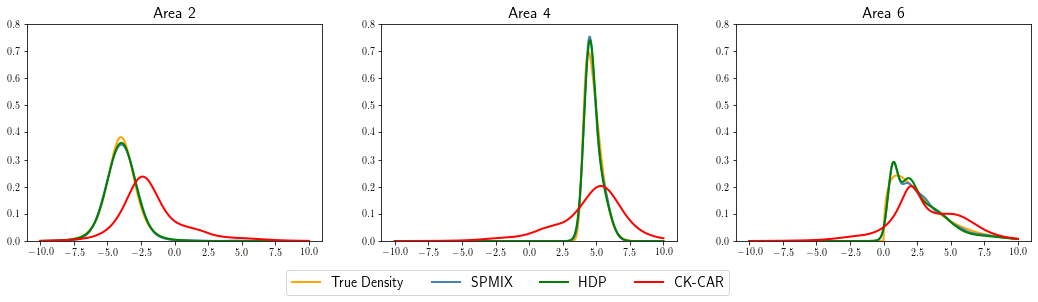

In [70]:
import seaborn as sns

locations = [1, 3, 5]
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

palette = sns.color_palette("hls", 8)

for i, loc in enumerate(locations):
    axes[i].plot(xgrid, true_dens_scenario12[loc], color="orange", lw=2, label="True Density")
    axes[i].plot(xgrid, np.mean(dens_spmix[loc], 0), lw=2, label="SPMIX", color="steelblue")
    axes[i].plot(xgrid, np.mean(dens_hdp[loc], 0), lw=2, label="HDP", color="green")
    axes[i].plot(xgrid, np.mean(dens_jo[loc], 0), lw=2, label="CK-CAR", color="red")
    axes[i].set_title("Area {0}".format(loc+1), fontsize=16)

for i in range(3):
    axes[i].set_ylim(0.0, 0.8)
    
axes[1].legend(bbox_to_anchor=(1.2, -0.1), ncol=4, fontsize=14)
plt.savefig("scenario1_density.pdf", bbox_inches='tight')
plt.show()